In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
df=pd.read_csv('C:/Users/avrather/Downloads/heart.csv' )

In [4]:
df["Sex"]=df["Sex"].map({"M":1, "F":0})
df["ExerciseAngina"]=df["ExerciseAngina"].map({"Y":1, "N":0})

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df=df.drop(["ChestPainType",'RestingECG','ST_Slope'],axis=1)

In [8]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0,0.0,0
1,49,0,160,180,0,156,0,1.0,1
2,37,1,130,283,0,98,0,0.0,0
3,48,0,138,214,0,108,1,1.5,1
4,54,1,150,195,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1
914,68,1,144,193,1,141,0,3.4,1
915,57,1,130,131,0,115,1,1.2,1
916,57,0,130,236,0,174,0,0.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   MaxHR           918 non-null    int64  
 6   ExerciseAngina  918 non-null    int64  
 7   Oldpeak         918 non-null    float64
 8   HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 64.7 KB


In [10]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler () 
df[["ExerciseAngina","Sex"]]=scaler.fit_transform(df[["ExerciseAngina","Sex"]]) 
df["MaxHR"]=scaler.fit_transform(df[["HeartDisease"]])

In [11]:
x=df[["ExerciseAngina","Sex"]]
y=df["HeartDisease"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [12]:
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.1852437037313091
R squared 0.2568300943799974


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression                     #LogisticRegression
from sklearn import metrics
x=df[["ExerciseAngina",'Sex']]
y=df['HeartDisease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("accuracy={:.2f}".format(logreg.score(x_test,y_test)))

accuracy=0.70


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

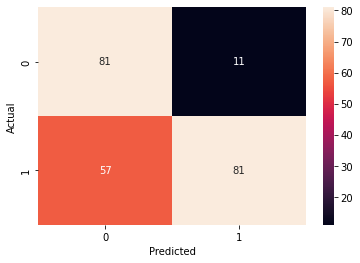

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

model 2 AUC score: 0.733695652173913


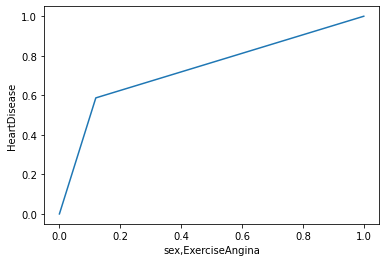

In [15]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
y=df.HeartDisease
x=df.ExerciseAngina
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
def plot_roc_curve(true_y,y_prob):
    true_y,y_prob, thresholds = roc_curve(true_y,y_prob)
    plt.plot(true_y,y_prob)
    plt.xlabel("sex,ExerciseAngina")
    plt.ylabel("HeartDisease")
plot_roc_curve(y_test, y_pred)
print(f'model 2 AUC score: {roc_auc_score(y_test, y_pred)}')

In [16]:
df
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

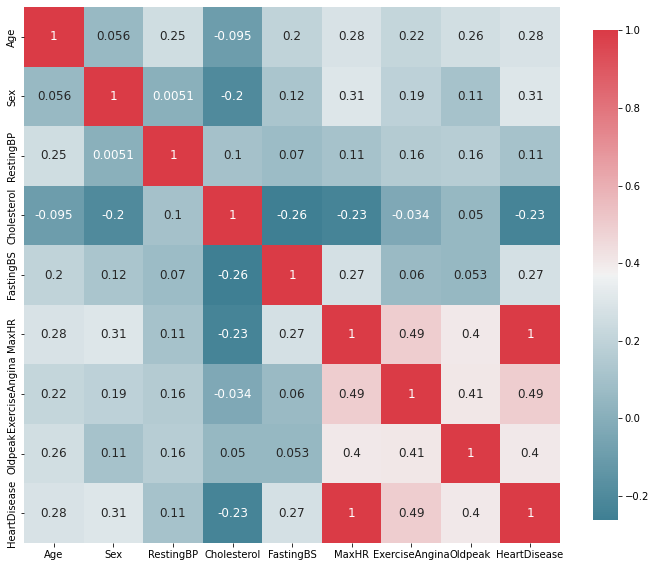

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plot_correlation_map( df )


In [18]:
x=df[["Age",'Sex']]
y=df['HeartDisease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("accuracy={:.2f}".format(logreg.score(x_test,y_test)))

accuracy=0.74


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6413043478260869


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x=df.drop([ "Cholesterol","MaxHR"], axis=1)
y= df["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred)))

score:1.0


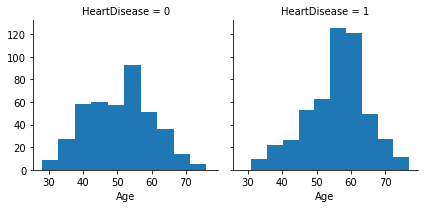

In [24]:
grid= sns.FacetGrid(df,col="HeartDisease")
grid.map(plt.hist,"Age",bins=10)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Oldpeak'>

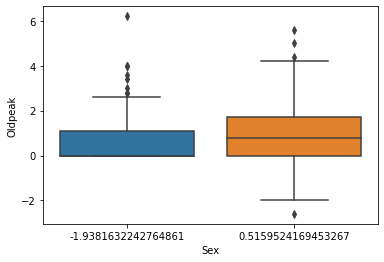

In [30]:
sns.boxplot(df['Sex'], df["Oldpeak"])